Description: This program uses the Money Flow Index to determine when to buy or sell a stock
Libraries


In [417]:
!pip3 install yfinance
import yfinance as yf
import numpy as np 
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
yf.pdr_override() 
import datetime as dt 
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [502]:
tick = yf.Ticker('AY') # ADA-USD # EURUSD%3DX # EURGBP%3DX # HG=F #CAKE  'CL=F GC=F HG=F PA=F SB=F ALI=F
hist = tick.history(period='360d')[['High','Low','Close','Volume']]

Visually see the data

<function matplotlib.pyplot.show>

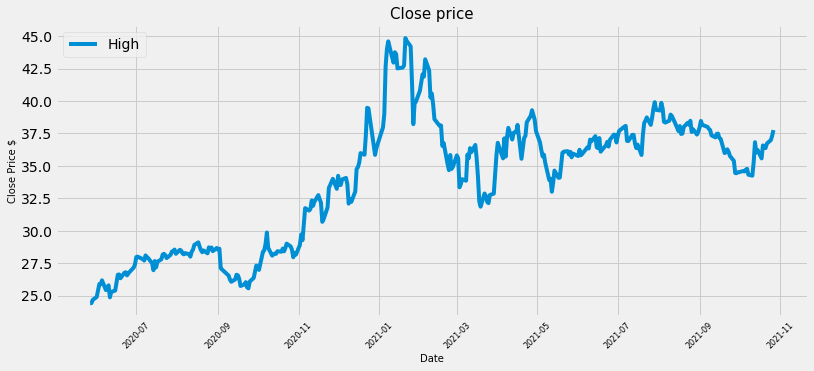

In [503]:
plt.figure(figsize=(12,5))
plt.title('Close price',fontsize = 15)
plt.plot(hist['Close'],label = 'Price')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price $', fontsize = 10)
plt.legend(hist.columns.values, loc='upper left')
plt.xticks(rotation=45, fontsize = 8)
plt.show

Calculate the typical price

In [504]:
typical_price= (hist['Close']+ hist['High']+hist['Low'])/3
typical_price

Date
2020-05-27    24.447458
2020-05-28    24.475261
2020-05-29    24.600237
2020-06-01    24.801070
2020-06-02    25.213715
                ...    
2021-10-21    36.426668
2021-10-22    36.546665
2021-10-25    36.920001
2021-10-26    37.233334
2021-10-27    37.688334
Length: 360, dtype: float64

Get the period

In [505]:
period = 14

Calculate the money flow

In [506]:
money_flow = typical_price * hist['Volume']

Get all the positive and negative money flows

In [507]:
positive_flow = []
negative_flow = []

for i in range(1, len(typical_price)):
  if typical_price[i]> typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i]< typical_price[i-1]:
    negative_flow.append(money_flow[i-1])
    positive_flow.append(0)
  else:
    negative_flow.append(0)
    positive_flow.append(0)

Get all the positive an negatie money flows with time period

In [508]:
positive_mf = []
negative_mf = []

for i in range(period-1,len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+ 1- period : i+1]))
for i in range(period-1,len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+ 1- period : i+1]))

Calculate the money flow index

In [509]:
mfi = 100 * np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf))


Visually show the MFI

<function matplotlib.pyplot.show>

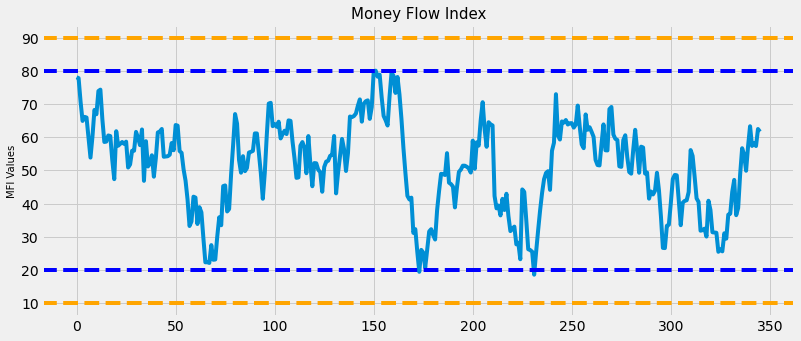

In [510]:
df2 = pd.DataFrame()
df2['MFI'] = mfi
#Create Plot
plt.figure(figsize=(12,5))
plt.title('Money Flow Index',fontsize = 15)
plt.plot(df2['MFI'], label = 'MFI')
plt.ylabel('MFI Values', fontsize = 10)
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(20, linestyle= '--', color = 'blue')
plt.axhline(80, linestyle= '--', color = 'blue')
plt.axhline(90, linestyle= '--', color = 'orange')
plt.show

In [511]:
new_df = pd.DataFrame()
new_df = hist[period:]
new_df ['MFI'] = mfi
new_df.head(2)

,High,Low,Close,Volume,MFI
Date,,,,,
2020-06-16,26.255524,25.700101,25.973106,331400,78.159495
2020-06-17,27.319301,26.215984,26.603840,456900,77.876640


Create a function to get the buy and sell signals

In [512]:
def get_signal(data, high, low):
  buy_signal = []
  sell_signal = []

  for i in range (len(data['MFI'])):
    if data['MFI'][i]> high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan) 
    else:
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)
  return (buy_signal,sell_signal)

Add new columns (Buy and Sell)

In [513]:
new_df['Buy'] = get_signal(new_df, 80,20)[0]
new_df['Sell'] = get_signal(new_df, 80,20)[1]

Plot the data

<function matplotlib.pyplot.show>

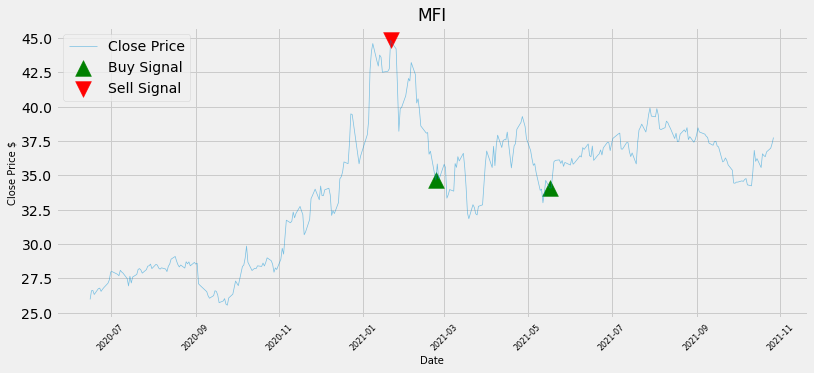

In [514]:
plt.figure(figsize=(12,5))
plt.title('MFI',fontsize = 17)
plt.plot(new_df['Close'],label = 'Close Price', alpha = 0.5, linewidth= 0.7)
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label = 'Buy Signal', marker='^', alpha =1, s = 250)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label = 'Sell Signal', marker='v', alpha =1, s = 250 )
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price $', fontsize = 10)
plt.legend(loc='upper left')
plt.xticks(rotation=45, fontsize = 8)
plt.show

In [515]:
new_df.describe()

,High,Low,Close,Volume,MFI,Buy,Sell
count,346.000000,346.000000,346.000000,3.460000e+02,346.000000,2.000000,1.000000
mean,34.602566,33.598068,34.104112,6.958446e+05,51.285632,34.370016,44.846268
std,4.852179,4.595360,4.714606,5.908929e+05,13.575778,0.415186,NaN
min,25.610428,25.114064,25.553156,9.183900e+04,18.557803,34.076435,44.846268
25%,28.931355,28.365406,28.667357,3.895750e+05,41.810194,34.223226,44.846268
50%,36.193414,34.983617,35.576561,5.281000e+05,53.178751,34.370016,44.846268
75%,37.873090,36.900000,37.399780,8.050250e+05,61.134963,34.516807,44.846268
max,46.846096,43.976783,44.846268,8.366000e+06,80.118167,34.663597,44.846268
